In [48]:
#These lines set up inline plotting, and apply a standard size
%matplotlib inline
import matplotlib
matplotlib.rc('font', **{'size': 22})
# Standard includes
from datetime import datetime
import re
import os
import json
import matplotlib.pyplot as plt
from time import time
import timeit
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from matplotlib.dates import DateFormatter
from matplotlib.dates import HourLocator
from numpy import genfromtxt
import matplotlib.dates as mdates
import numpy.polynomial.polynomial as poly

In [49]:
finished = pd.read_csv('finished_errordiag.csv', header = 0, index_col='creationtime per day') 
failed   = pd.read_csv('failed_errordiag.csv', header = 0, index_col='creationtime per day') 

In [50]:
finished.index

Int64Index([1531094400000, 1531180800000, 1531267200000, 1531353600000,
            1531440000000, 1531526400000, 1531612800000, 1531699200000,
            1531785600000, 1531872000000, 1531958400000, 1532044800000,
            1532131200000, 1532217600000, 1532304000000, 1532390400000,
            1532476800000, 1532563200000, 1532649600000, 1532736000000,
            1532822400000, 1532908800000, 1532995200000, 1533081600000,
            1533168000000, 1533254400000, 1533340800000, 1533427200000,
            1533513600000, 1533600000000, 1533686400000, 1533772800000,
            1533859200000, 1533945600000, 1534032000000, 1534118400000,
            1534204800000, 1534291200000, 1534377600000, 1534464000000,
            1534550400000, 1534636800000, 1534723200000, 1534809600000,
            1534896000000, 1534982400000, 1535068800000, 1535155200000,
            1535241600000, 1535328000000, 1535414400000, 1535500800000,
            1535587200000, 1535673600000, 1535760000000, 1535846

In [51]:
run_nevents = {}
nidx = 0
for i in finished.index:
    do = datetime.fromtimestamp(i/1000.)
    do += timedelta(days=1)
    if not do in run_nevents.keys(): run_nevents[do] = 0
    #print(nidx)
    run_nevents[do] += finished['Count'][i]
    nidx += 1
names = ['date','Count']
formats = ['datetime64[D]','f8']
dtype = dict(names = names, formats=formats)
finished_array = np.array(sorted(list(run_nevents.items())), dtype=dtype)
print(finished_array)

[('2018-07-09',  18135.) ('2018-07-10',   7243.) ('2018-07-11',  44499.)
 ('2018-07-12', 173785.) ('2018-07-13',  31955.) ('2018-07-14',   7492.)
 ('2018-07-15',  23721.) ('2018-07-16',  54250.) ('2018-07-17',  26920.)
 ('2018-07-18',  16817.) ('2018-07-19',  18505.) ('2018-07-20', 283388.)
 ('2018-07-21', 104168.) ('2018-07-22',   3782.) ('2018-07-23', 314262.)
 ('2018-07-24', 154947.) ('2018-07-25',  94150.) ('2018-07-26',  80582.)
 ('2018-07-27',  78361.) ('2018-07-28',  14938.) ('2018-07-29',  13242.)
 ('2018-07-30',  13538.) ('2018-07-31',  33550.) ('2018-08-01',  82719.)
 ('2018-08-02',  76501.) ('2018-08-03',  61466.) ('2018-08-04', 102262.)
 ('2018-08-05',  60815.) ('2018-08-06',  51485.) ('2018-08-07',  54226.)
 ('2018-08-08',  60391.) ('2018-08-09',  79533.) ('2018-08-10',  66069.)
 ('2018-08-11',  56887.) ('2018-08-12',  44265.) ('2018-08-13',  71049.)
 ('2018-08-14',  66425.) ('2018-08-15',  38492.) ('2018-08-16',  35976.)
 ('2018-08-17',  51839.) ('2018-08-18',  42803.) ('

In [52]:
run_nevents = {}
nidx = 0
for i in failed.index:
    do = datetime.fromtimestamp(i/1000.)
    do += timedelta(days=1)
    if not do in run_nevents.keys(): run_nevents[do] = 0
    #print(nidx)
    run_nevents[do] += failed['Count'][i]
    nidx += 1
names = ['date','Count']
formats = ['datetime64[D]','f8']
dtype = dict(names = names, formats=formats)
failed_array = np.array(sorted(list(run_nevents.items())), dtype=dtype)
print(failed_array)

[('2018-07-09',   6.) ('2018-07-10',   1.) ('2018-07-11',  40.)
 ('2018-07-12',  96.) ('2018-07-13',  21.) ('2018-07-14',  51.)
 ('2018-07-15',  77.) ('2018-07-16', 136.) ('2018-07-17',  40.)
 ('2018-07-18',  36.) ('2018-07-19',  45.) ('2018-07-20',  17.)
 ('2018-07-21',   5.) ('2018-07-23',  32.) ('2018-07-24',  60.)
 ('2018-07-25',  75.) ('2018-07-26', 167.) ('2018-07-27',  51.)
 ('2018-07-28',  10.) ('2018-07-29',   3.) ('2018-07-30',   7.)
 ('2018-07-31',  36.) ('2018-08-01', 187.) ('2018-08-02', 108.)
 ('2018-08-03',  49.) ('2018-08-04',  25.) ('2018-08-05', 119.)
 ('2018-08-06', 153.) ('2018-08-07', 189.) ('2018-08-08',  53.)
 ('2018-08-09', 110.) ('2018-08-10',  32.) ('2018-08-11',  47.)
 ('2018-08-12', 104.) ('2018-08-13', 205.) ('2018-08-14', 125.)
 ('2018-08-15',  15.) ('2018-08-16',  21.) ('2018-08-17',  14.)
 ('2018-08-18',   8.) ('2018-08-19',  20.) ('2018-08-20',   7.)
 ('2018-08-21',  29.) ('2018-08-22',  19.) ('2018-08-23',  15.)
 ('2018-08-24',  39.) ('2018-08-25',  59

In [54]:
x = []
y_fail = []
y_fin  = []
y_rat  = []
for i in range(finished_array.shape[0]-1):
    x.append(finished_array[:][i][0])
    y_fin.append(finished_array[:][i][1])
    y_fin.append(finished_array[:][i][1])
    y_rat.append(failed_array[:][i][1]/finished_array[:][i][1])

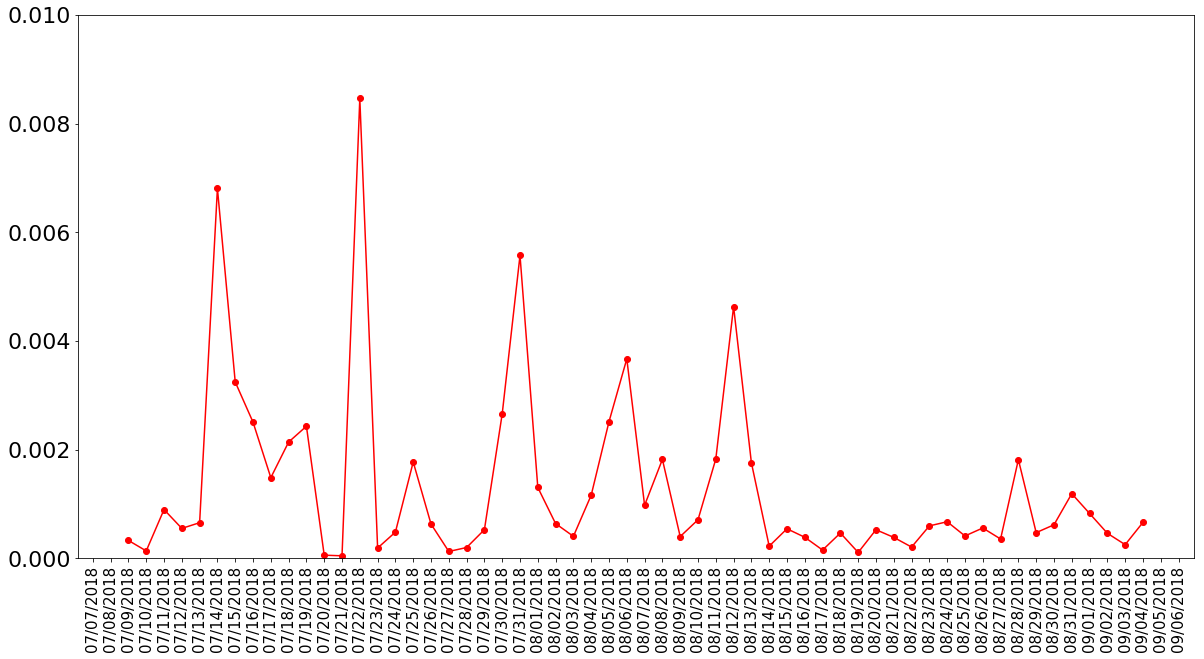

In [56]:
fig, ax = plt.subplots(figsize=(20,10))
plt.xticks(np.arange(min(x), max(x),dtype=np.datetime64),rotation='vertical')
ax.tick_params(axis='x', labelsize=15)
ax.set_ylim(0,0.01)
lst = plt.plot_date(x,y_rat,color='r',linestyle='-')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())